# Figure 7 

In [8]:
import dotdot
from neuromodel import Model, ReplicatedModel, Offers, run_model
import neuromodel.graphs

#%matplotlib notebook

Like all figures in this replication effort, you can either employ the model that replicate the behavior of the Matlab code used to produce the figures in the original article, or the model that contains fixes to make it as close a the description in the original article.

In [9]:
# set to True if you want to replicate the published figures.
# set to False to use the 'corrected' model, as described in the article.
replicate = True

filename_suffix = ''
if replicate:
    filename_suffix = '_replicate'
    Model = ReplicatedModel #  replacing the Model class

In [10]:
ΔA, ΔB, n = 10, 20, 4000
w_p = 1.82
offers = Offers(ΔA=ΔA, ΔB=ΔB, n=n, random_seed=0)

In [11]:
def compute_fig7_data(w_p):
    model = Model(n=n, ΔA=ΔA, ΔB=ΔB, hysteresis = True, random_seed=1,
                  range_A=offers.range_A, range_B=offers.range_B,
                 w_p = w_p)

    filename='data/fig7[{}]_{}{}.pickle'.format(n, w_p, filename_suffix)
    return run_model(model, offers, history_keys=('r_ovb', 'r_2', 'r_I'), filename=filename)

In [12]:
analysis = compute_fig7_data(w_p)
graph = neuromodel.graphs.Graph(analysis, filename_suffix=filename_suffix)

Loading results of ReplicatedModel from disk: data/fig7[4000]_1.82_replicate.pickle.


In [13]:
# CJB firing across time
#data_7E = analysis.hysteresis_data()
data_7E = analysis.choice_hysteresis()
figure_7E = graph.means_previous_choice(data_7E, title='Figure 7E', y_ticks =(0, 10, 20, 30, 40))

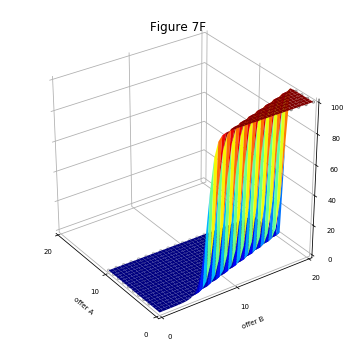

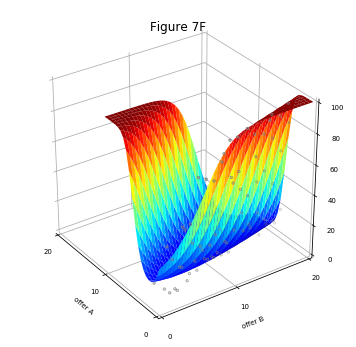

In [14]:
# % choice B
graph.regression_3D(analysis.regression_hysteresis(type='easy', range_A = ΔA), title='Figure 7F')
graph.regression_3D(analysis.regression_hysteresis(type='split', range_A = ΔA), title='Figure 7F')

In [ ]:
figure_7D = 

In [ ]:
figure_7E = 

In [ ]:
figure_7F = 